Importing libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read Data and Make a Look of it

In [49]:
df=pd.read_csv("House_Rent_Dataset.csv")
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,5/13/2022,2,20000.0,NaN,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,5/16/2022,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,7/4/2022,2,10000.0,NaN,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,5/9/2022,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [50]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.741000e+03,4738.000000,4742.000000
mean,2.083860,3.502340e+04,967.936049,1.965837
std,0.832256,7.814214e+04,634.562635,0.884904
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4741 non-null   float64
 3   Size               4738 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4739 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4742 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 445.1+ KB


Check for Nulls and Duplicates

In [52]:
df.isna().sum().sort_values(ascending=False)

Size                 8
Area Type            7
Rent                 5
Bathroom             4
Posted On            0
BHK                  0
Floor                0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Point of Contact     0
dtype: int64

In [53]:
df.duplicated().sum()


0

Handle Nulls

In [54]:
df.dropna(inplace=True)
#Because number of nulls are very small

Make a colomns of year and month



In [55]:
df["Year"] = df["Posted On"].apply(lambda x: x.split('/')[2] if isinstance(x, str) and len(x.split('/')) == 3 else np.nan)

In [56]:
df["Year"].unique()

array(['2022'], dtype=object)

In [57]:
df["Month"]=df["Posted On"].apply(lambda x: x.split('/')[0])
df["Month"].unique()

array(['5', '4', '6', '7'], dtype=object)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4726 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4726 non-null   object 
 1   BHK                4726 non-null   int64  
 2   Rent               4726 non-null   float64
 3   Size               4726 non-null   float64
 4   Floor              4726 non-null   object 
 5   Area Type          4726 non-null   object 
 6   Area Locality      4726 non-null   object 
 7   City               4726 non-null   object 
 8   Furnishing Status  4726 non-null   object 
 9   Tenant Preferred   4726 non-null   object 
 10  Bathroom           4726 non-null   float64
 11  Point of Contact   4726 non-null   object 
 12  Year               4726 non-null   object 
 13  Month              4726 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 553.8+ KB


Drop Colomns that will not need

In [59]:
df.drop(["Year","Posted On"],axis=1,inplace=True)

See the Unique values for each object data

In [60]:
for col in df.select_dtypes(include="object"):
    print(f"The unique values for {col} is {df[col].unique()}")
    print('*'*50)

The unique values for Floor is ['Ground out of 2' '1 out of 3' '1 out of 2' 'Ground out of 1'
 'Ground out of 4' '1 out of 1' 'Ground out of 3' '4 out of 5'
 '2 out of 3' '2 out of 2' '2 out of 5' '4 out of 14' '3 out of 3'
 '5 out of 5' '4 out of 4' '7 out of 8' '1 out of 4' '2 out of 4'
 '3 out of 4' '1 out of 5' '8 out of 5' 'Ground out of 6' '2 out of 1'
 'Upper Basement out of 4' 'Ground out of 5' '3 out of 5' '11 out of 19'
 '5 out of 10' '11 out of 14' 'Lower Basement out of 2' '2 out of 7'
 '4 out of 10' '7 out of 10' '2 out of 13' '6 out of 7' '4 out of 7'
 '14 out of 14' '43 out of 78' '2 out of 8' '13 out of 18' '5 out of 12'
 '18 out of 24' '3 out of 7' '17 out of 31' '11 out of 21' '7 out of 19'
 '14 out of 23' '9 out of 20' 'Upper Basement out of 9' '19 out of 24'
 '3 out of 21' '1 out of 22' '8 out of 8' '6 out of 12' '4 out of 58'
 'Upper Basement out of 16' '60 out of 66' '34 out of 48' '5 out of 8'
 '5 out of 14' '14 out of 40' '5 out of 7' '9 out of 22' '12 out of 18

Make a new column of floor number

In [61]:
df['Floor_Num'] = df['Floor'].apply(
    lambda x: 0 if 'Ground' in str(x)
    else -1 if 'Upper Basement' in str(x)
    else -2 if 'Lower Basement' in str(x)
    else int(str(x).split(' ')[0]) if pd.notna(x) and str(x).split(' ')[0].isdigit()
    else np.nan
)

df["Apartment_num"] = df["Floor"].apply(
    lambda x: 10 if pd.isna(x) or 'Ground' in str(x) or 'Basement' in str(x)
    else 10 if not str(x).split()[-1].isdigit()
    else int(str(x).split()[-1])
)



In [62]:
print(df['Floor_Num'].value_counts().sort_index())
print(df["Apartment_num"].value_counts().sort_index())



Floor_Num
-2       11
-1       23
 0      918
 1     1151
 2      944
 3      512
 4      272
 5      164
 6       93
 7       74
 8       66
 9       65
 10      67
 11      43
 12      47
 13      15
 14      34
 15      41
 16      21
 17      22
 18      26
 19      16
 20      12
 21       6
 22       3
 23       9
 24       6
 25      12
 26       3
 27       3
 28       4
 29       1
 30       5
 32       3
 33       1
 34       4
 35       3
 36       2
 37       1
 39       1
 40       2
 41       1
 43       1
 44       1
 45       2
 46       1
 47       1
 48       2
 49       1
 50       1
 53       2
 60       3
 65       3
 76       1
Name: count, dtype: int64
Apartment_num
1     133
2     508
3     700
4     818
5     392
     ... 
77      2
78      4
81      1
85      1
89      1
Name: count, Length: 66, dtype: int64


In [63]:
df.drop("Floor",axis=1,inplace=True)

Show a mean of Rent for each Feature

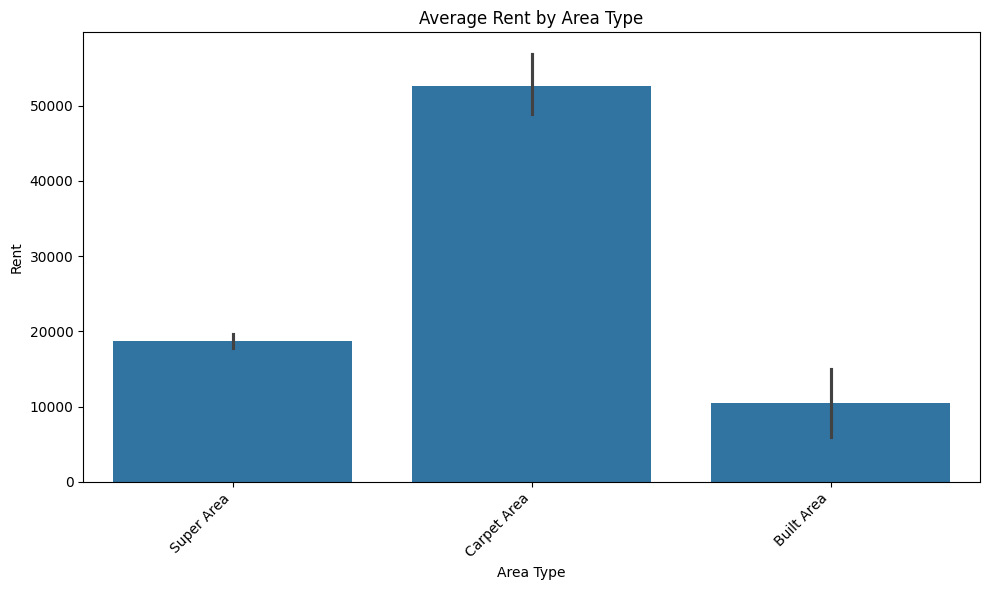

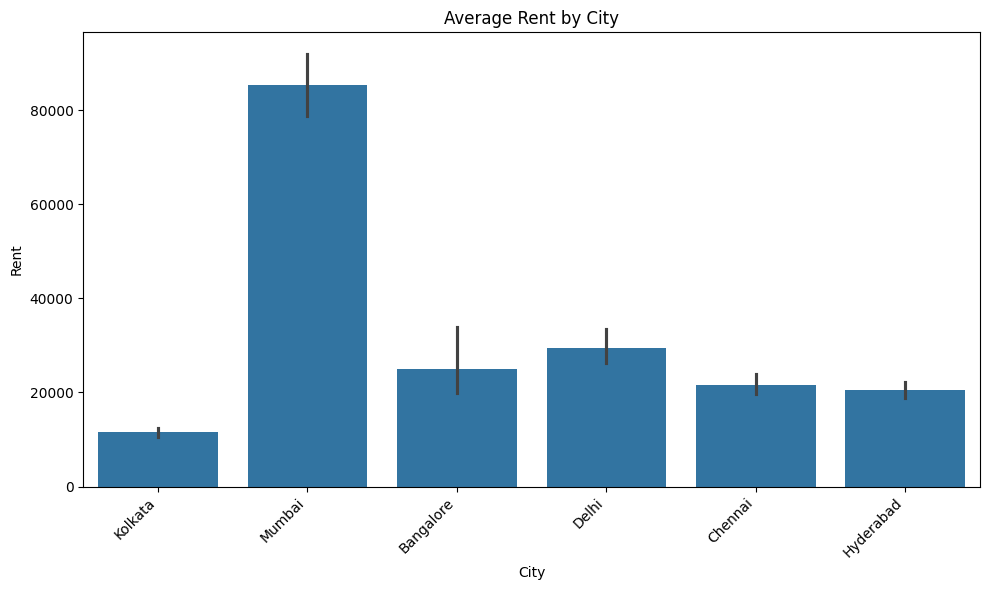

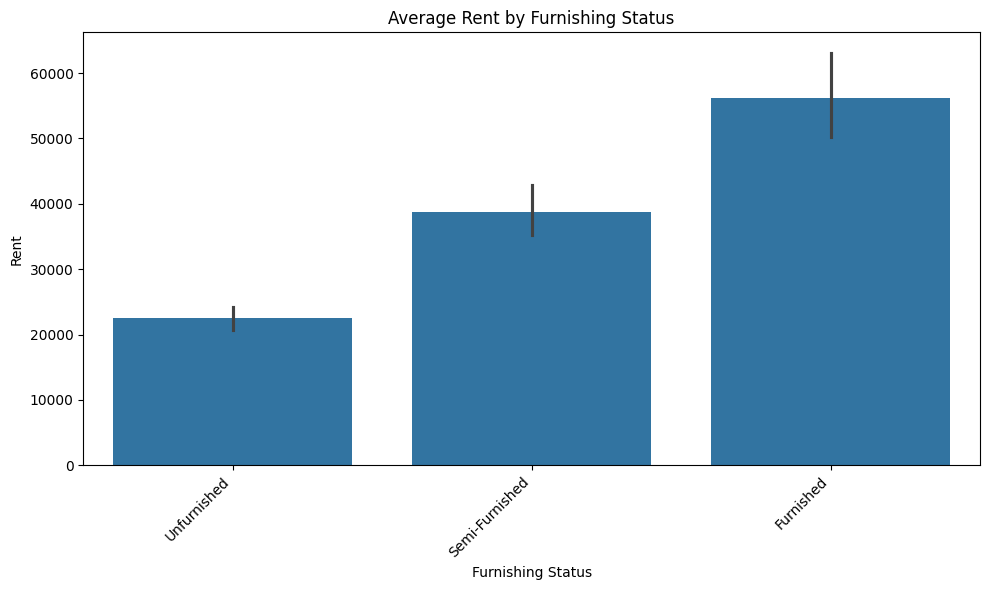

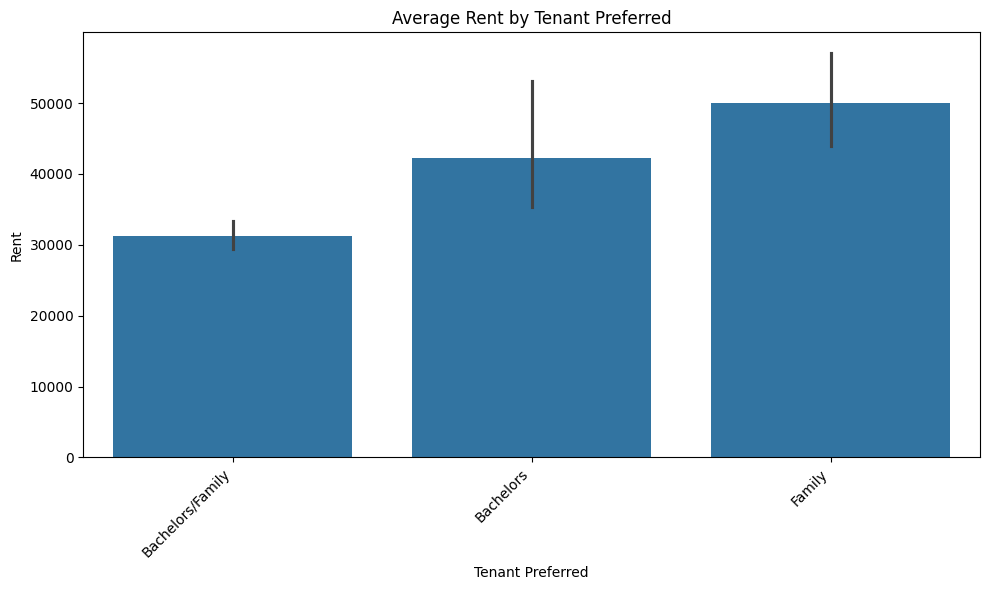

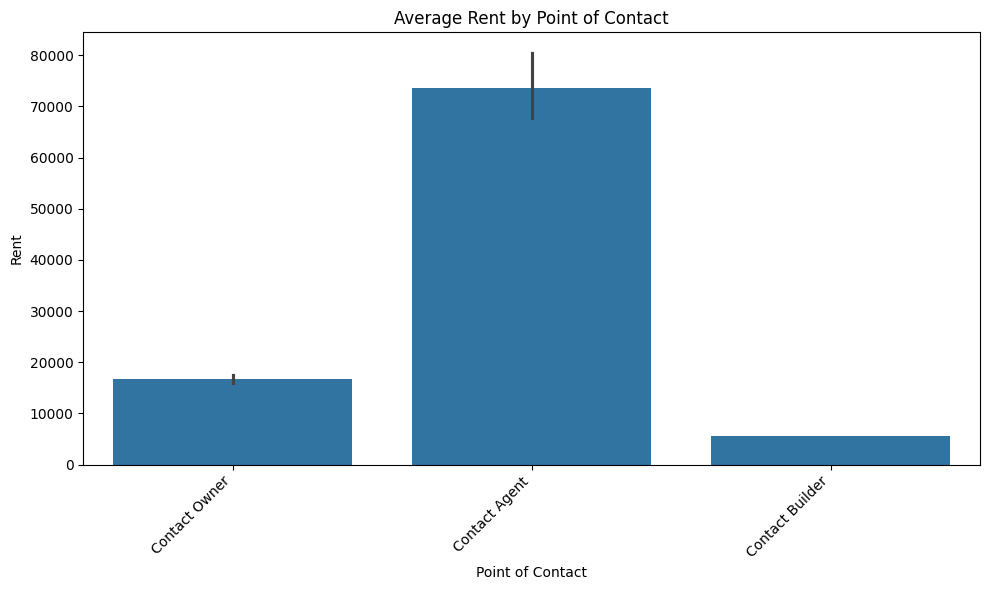

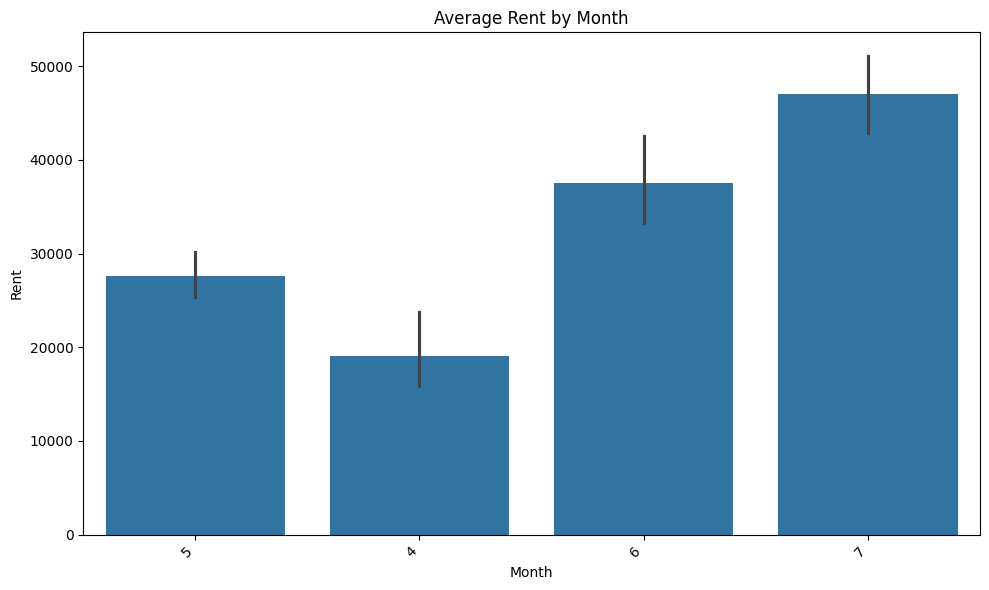

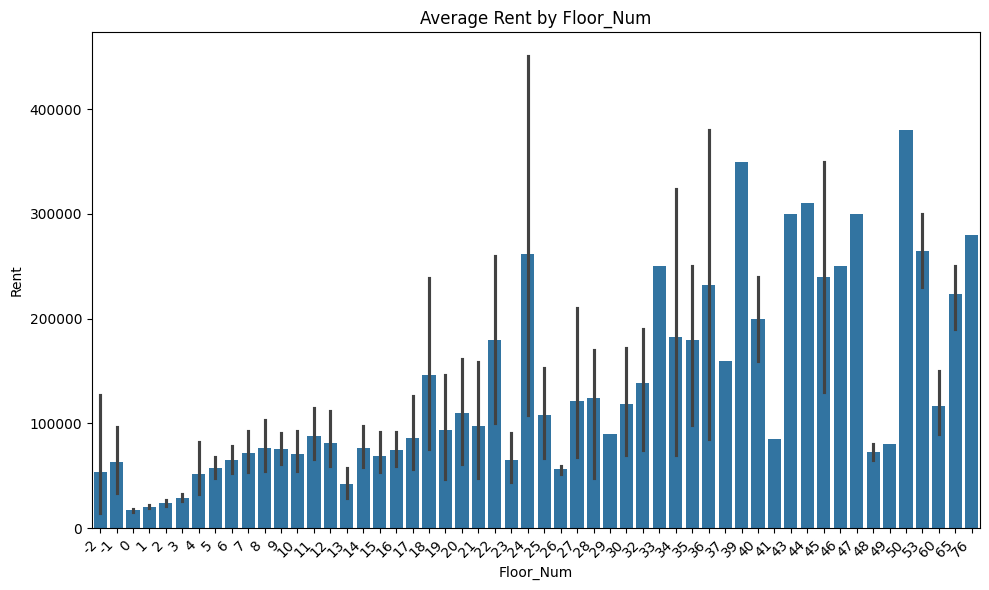

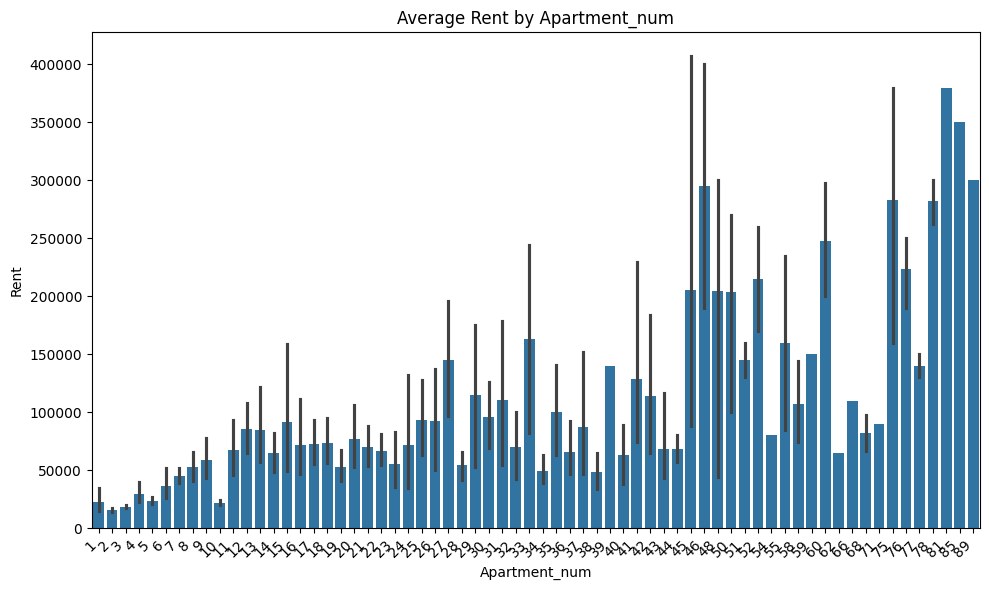

In [64]:
Feature=["Area Type","City","Furnishing Status","Tenant Preferred","Point of Contact","Month",'Floor_Num',"Apartment_num"]
for col in Feature:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=col, y="Rent", estimator='mean') 
    plt.title(f'Average Rent by {col}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()

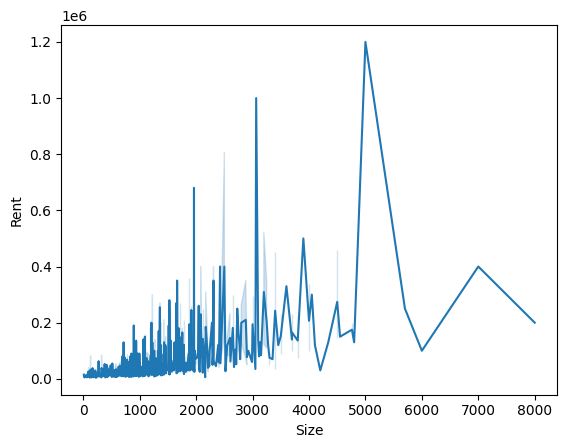

In [65]:
plt.Figure(figsize=(10,8))
sns.lineplot(data=df,x="Size",y="Rent",estimator="mean")
plt.show()

<Axes: xlabel='Bathroom', ylabel='Size'>

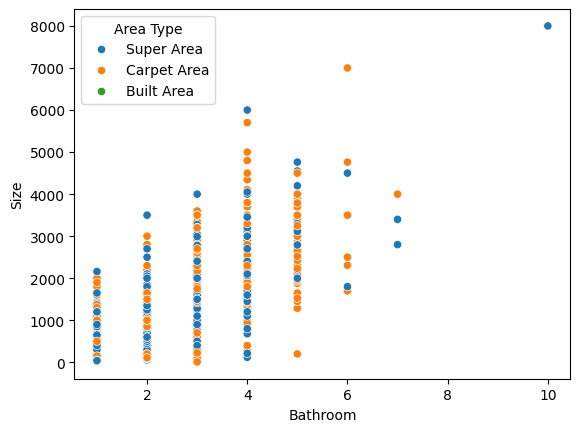

In [66]:
sns.scatterplot(data=df,x="Bathroom",y="Size",hue="Area Type")

<Axes: xlabel='Size', ylabel='Rent'>

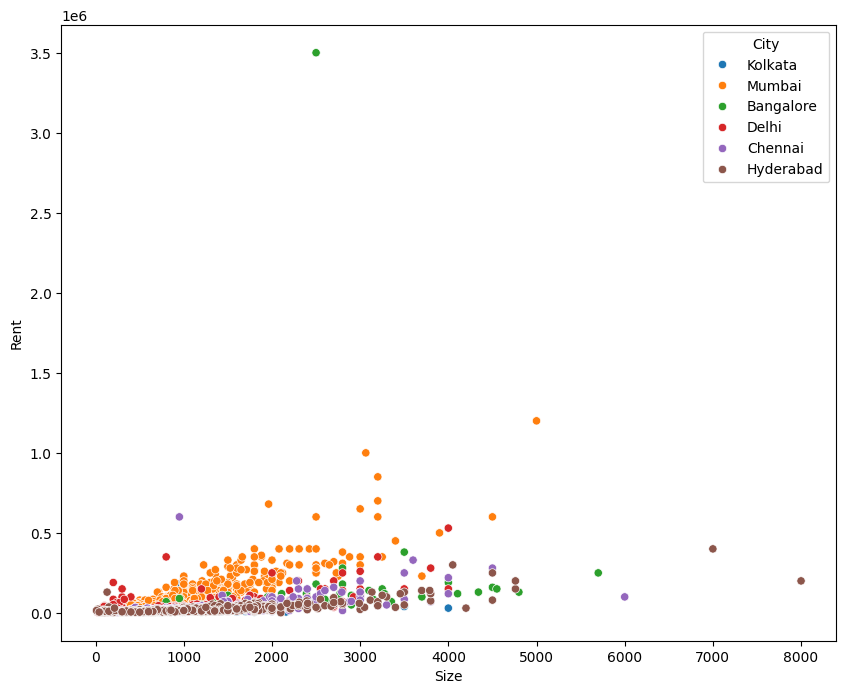

In [67]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="Size",y="Rent",hue="City")

Check for the outlier

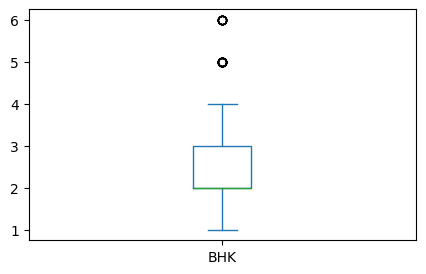

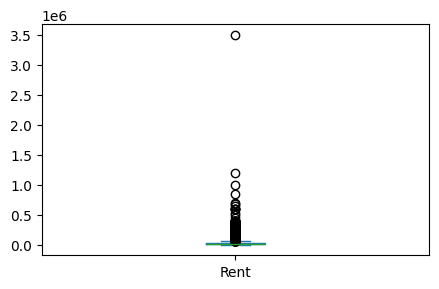

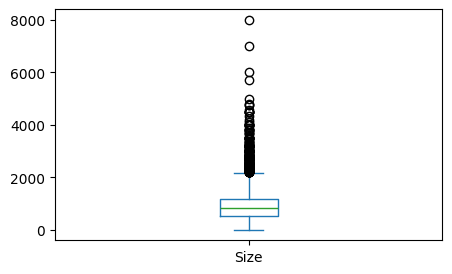

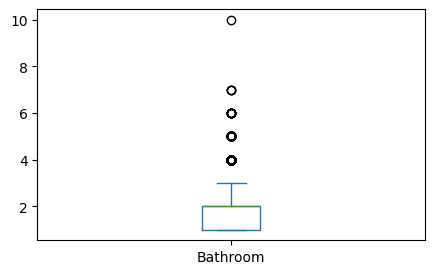

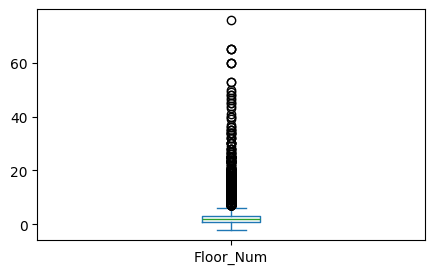

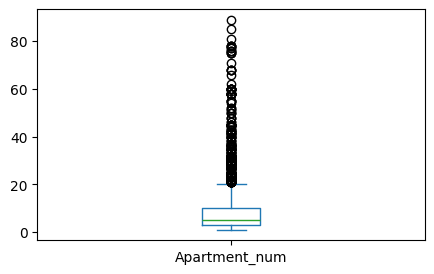

In [68]:
for col in df.select_dtypes(include="number"):
    plt.figure(figsize=(5,3))
    df[col].plot(kind="box")
    plt.show()

Handle outlier for numerical data

In [69]:
Outlier_col=df[["Bathroom","Size","BHK","Apartment_num","Floor_Num"]]
for col in Outlier_col:
    df[col].sort_values(ascending=True)
    q1 = np.percentile(df[col], 25, method="midpoint")
    q3 = np.percentile(df[col], 75, method="midpoint")
    print(f"Q1 for {col} is {q1}")
    print(f"Q3 for {col} is {q3}")
    iqr=q3-q1
    print(f"IQR for {col} is {iqr}")
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"Outlier Lower Bound: {lower_bound}")
    print(f"Outlier Upper Bound: {upper_bound}")
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print('/'*50)


Q1 for Bathroom is 1.0
Q3 for Bathroom is 2.0
IQR for Bathroom is 1.0
Outlier Lower Bound: -0.5
Outlier Upper Bound: 3.5
//////////////////////////////////////////////////
Q1 for Size is 550.0
Q3 for Size is 1150.0
IQR for Size is 600.0
Outlier Lower Bound: -350.0
Outlier Upper Bound: 2050.0
//////////////////////////////////////////////////
Q1 for BHK is 1.0
Q3 for BHK is 2.0
IQR for BHK is 1.0
Outlier Lower Bound: -0.5
Outlier Upper Bound: 3.5
//////////////////////////////////////////////////
Q1 for Apartment_num is 3.0
Q3 for Apartment_num is 10.0
IQR for Apartment_num is 7.0
Outlier Lower Bound: -7.5
Outlier Upper Bound: 20.5
//////////////////////////////////////////////////
Q1 for Floor_Num is 1.0
Q3 for Floor_Num is 3.0
IQR for Floor_Num is 2.0
Outlier Lower Bound: -2.0
Outlier Upper Bound: 6.0
//////////////////////////////////////////////////


In [70]:
df.isna().sum()


BHK                  0
Rent                 0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Month                0
Floor_Num            0
Apartment_num        0
dtype: int64

Encoding Object Data

In [71]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [72]:
le=LabelEncoder()
label_encoding_columns=["Area Type","Area Locality","Furnishing Status"]
for col in label_encoding_columns:
    df[col] = le.fit_transform(df[col])


In [73]:
One_hot_encoding_columns = ["City", "Tenant Preferred", "Point of Contact"]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[One_hot_encoding_columns])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(One_hot_encoding_columns), index=df.index)

df = pd.concat([df.drop(columns=One_hot_encoding_columns), encoded_df], axis=1)

In [74]:
df.head()


,BHK,Rent,Size,Area Type,Area Locality,Furnishing Status,Bathroom,Month,Floor_Num,Apartment_num,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000.0,1100.0,2,185,2,2.0,5,0,10,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,17000.0,1000.0,2,1439,1,1.0,5,1,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,7500.0,850.0,1,1550,2,1.0,5,1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,2,7000.0,600.0,2,1623,2,2.0,4,0,10,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,2,10000.0,700.0,2,974,2,2.0,6,0,10,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [75]:
df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 3828 entries, 0 to 4745
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                3828 non-null   int64  
 1   Rent                               3828 non-null   float64
 2   Size                               3828 non-null   float64
 3   Area Type                          3828 non-null   int32  
 4   Area Locality                      3828 non-null   int32  
 5   Furnishing Status                  3828 non-null   int32  
 6   Bathroom                           3828 non-null   float64
 7   Month                              3828 non-null   object 
 8   Floor_Num                          3828 non-null   int64  
 9   Apartment_num                      3828 non-null   int64  
 10  City_Bangalore                     3828 non-null   float64
 11  City_Chennai                       3828 non-null   float64
 1

In [76]:
df["Month"]=df["Month"].astype(dtype="Float64")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3828 entries, 0 to 4745
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                3828 non-null   int64  
 1   Rent                               3828 non-null   float64
 2   Size                               3828 non-null   float64
 3   Area Type                          3828 non-null   int32  
 4   Area Locality                      3828 non-null   int32  
 5   Furnishing Status                  3828 non-null   int32  
 6   Bathroom                           3828 non-null   float64
 7   Month                              3828 non-null   Float64
 8   Floor_Num                          3828 non-null   int64  
 9   Apartment_num                      3828 non-null   int64  
 10  City_Bangalore                     3828 non-null   float64
 11  City_Chennai                       3828 non-null   float64
 1

Check Nulls and handle them

In [78]:
df.isna().sum()

BHK                                  0
Rent                                 0
Size                                 0
Area Type                            0
Area Locality                        0
Furnishing Status                    0
Bathroom                             0
Month                                0
Floor_Num                            0
Apartment_num                        0
City_Bangalore                       0
City_Chennai                         0
City_Delhi                           0
City_Hyderabad                       0
City_Kolkata                         0
City_Mumbai                          0
Tenant Preferred_Bachelors           0
Tenant Preferred_Bachelors/Family    0
Tenant Preferred_Family              0
Point of Contact_Contact Agent       0
Point of Contact_Contact Builder     0
Point of Contact_Contact Owner       0
dtype: int64

In [79]:
print(f"Shape before drop null is {df.shape}")
df.dropna(inplace=True)
print(f"Shape after drop null is {df.shape}")

Shape before drop null is (3828, 22)
Shape after drop null is (3828, 22)


Make the correlation map

<Axes: >

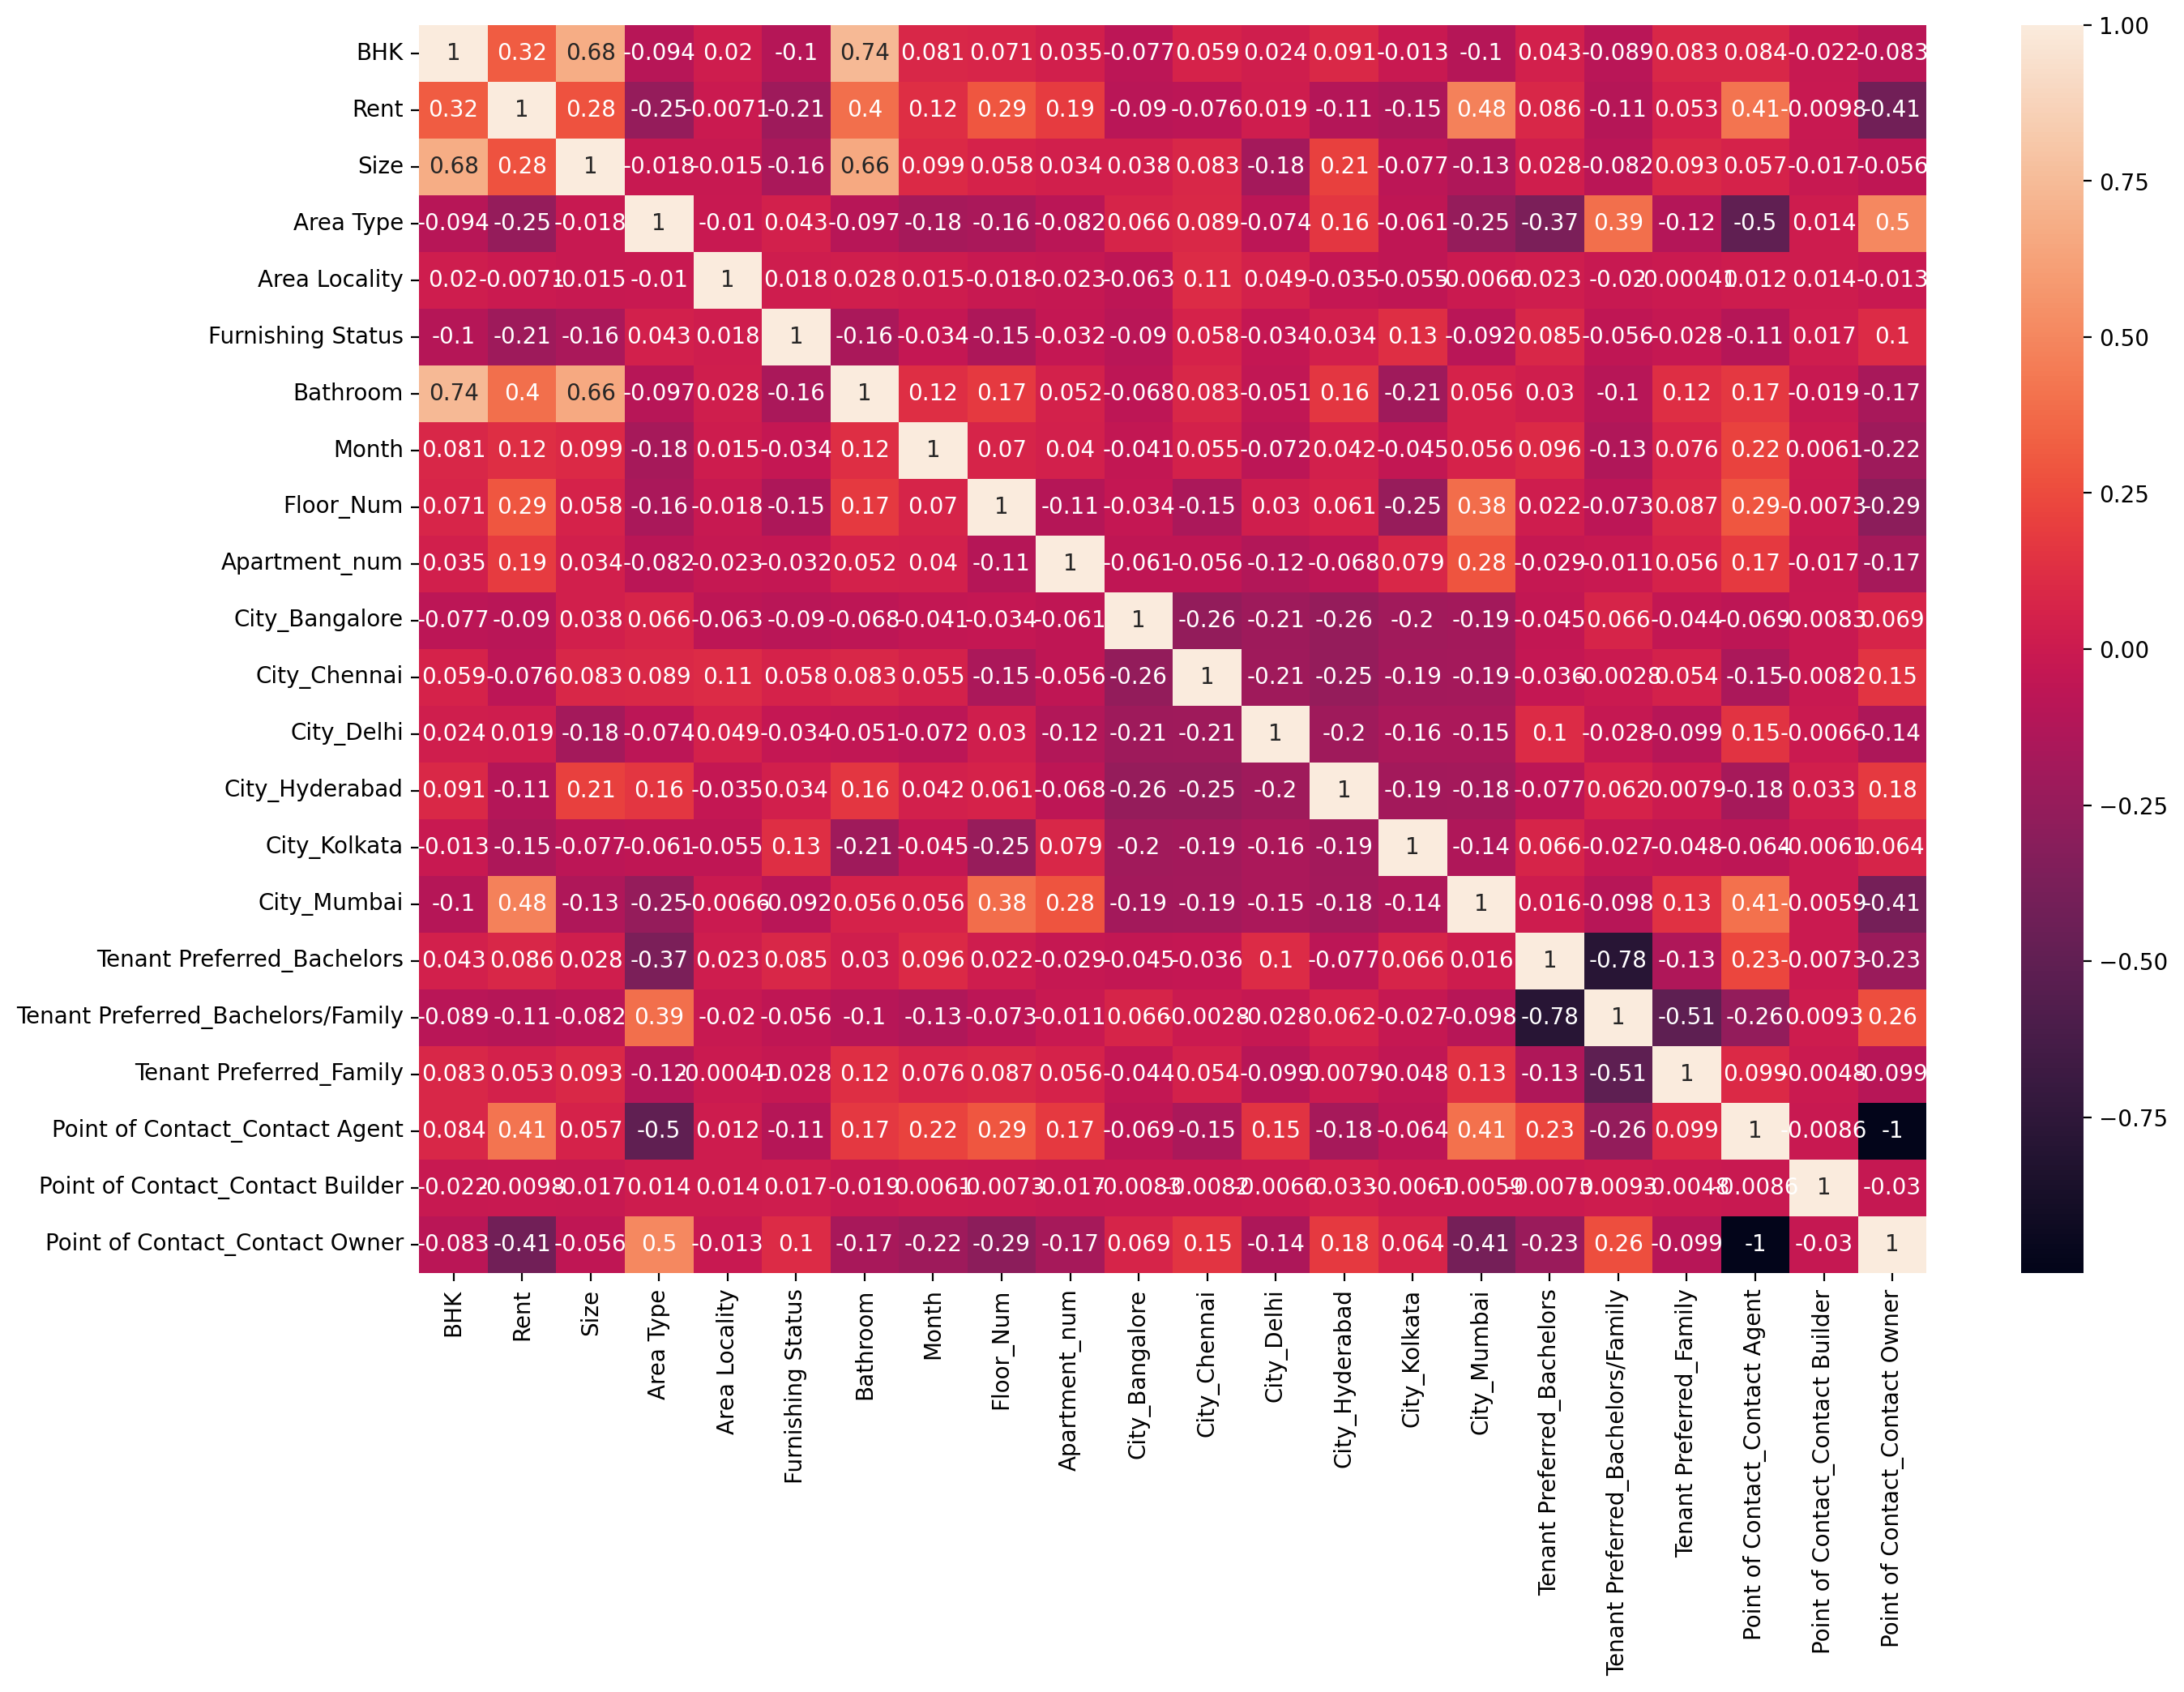

In [80]:
plt.figure(figsize=(15, 10), dpi=200)
sns.heatmap(df.corr(), annot=True)

Select features and target

In [81]:
X=df.drop("Rent",axis=1,inplace=False)
y=df["Rent"]

Apply standard scaler for numerical columns



In [82]:
from sklearn.preprocessing import StandardScaler
scale_cols = ['BHK', 'Size', 'Bathroom', 'Month', 'Floor_Num', 'Apartment_num']

sc = StandardScaler()
X[scale_cols] = sc.fit_transform(X[scale_cols])

In [83]:
X.head()

,BHK,Size,Area Type,Area Locality,Furnishing Status,Bathroom,Month,Floor_Num,Apartment_num,City_Bangalore,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,0.117729,0.619975,2,185,2,0.375487,-0.839898,-1.124107,1.236721,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.117729,0.382851,2,1439,1,-1.153623,-0.839898,-0.454471,-0.770619,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.117729,0.027166,1,1550,2,-1.153623,-0.839898,-0.454471,-1.057382,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0.117729,-0.565643,2,1623,2,0.375487,-2.060062,-1.124107,1.236721,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.117729,-0.328520,2,974,2,0.375487,0.380265,-1.124107,1.236721,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Check for best columns


In [84]:
from sklearn.feature_selection import f_regression,SelectKBest

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)

print(scores)

City_Mumbai                          1115.319364
Point of Contact_Contact Agent        793.002823
Point of Contact_Contact Owner        790.423121
Bathroom                              715.615258
BHK                                   423.427571
Floor_Num                             355.333834
Size                                  324.561073
Area Type                             264.006991
Furnishing Status                     184.635857
Apartment_num                         136.133009
City_Kolkata                           83.532323
Month                                  60.454953
City_Hyderabad                         46.848663
Tenant Preferred_Bachelors/Family      44.992198
City_Bangalore                         31.207912
Tenant Preferred_Bachelors             28.343336
City_Chennai                           22.016525
Tenant Preferred_Family                10.930788
City_Delhi                              1.441684
Point of Contact_Contact Builder        0.366185
Area Locality       

In [85]:
X.drop("Area Locality",axis=1,inplace=True)

Splitting data

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=44,shuffle=True)

Call Libraries,gridsearch and prepare them


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRFRegressor

In [90]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost RF": XGBRFRegressor()
}

In [91]:
param_grids = {
    "Linear Regression": {}, 
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100],
        "max_depth": [None, 10],
        "min_samples_split": [2, 5]
    },
    "AdaBoost": {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1, 1.0]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 150],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },
    "Support Vector Regressor": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf'],
        "epsilon": [0.1, 0.2]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ['uniform', 'distance']
    },
    "XGBoost RF": {
        "n_estimators": [50,100, 150],
        "learning_rate": [0.05, 0.1,1],
        "max_depth": [3, 5,10]
    }
}

In [92]:
best_models = {}

for name in regressors:
    print(f"\n Tuning: {name}")
    grid = GridSearchCV(estimator=regressors[name],
                        param_grid=param_grids[name],
                        scoring='r2',
                        cv=3,
                        n_jobs=-1)
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    
    best_models[name] = {
        "model": best_model,
        "r2": r2,
        "best_params": grid.best_params_
    }
    
    print(f"Best R²: {r2:.4f}")
    print(f"Best Params: {grid.best_params_}")



 Tuning: Linear Regression
Best R²: 0.4725
Best Params: {}

 Tuning: Decision Tree
Best R²: 0.5848
Best Params: {'max_depth': 3, 'min_samples_split': 2}

 Tuning: Random Forest
Best R²: 0.6222
Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}

 Tuning: AdaBoost
Best R²: 0.5877
Best Params: {'learning_rate': 0.01, 'n_estimators': 50}

 Tuning: Gradient Boosting
Best R²: 0.6359
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

 Tuning: Support Vector Regressor
Best R²: 0.2453
Best Params: {'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}

 Tuning: K-Nearest Neighbors
Best R²: 0.4784
Best Params: {'n_neighbors': 7, 'weights': 'distance'}

 Tuning: XGBoost RF
Best R²: 0.6034
Best Params: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}


In [93]:
top_model = max(best_models, key=lambda k: best_models[k]['r2'])
print(f"\n🏆 Best overall model: {top_model}")
print(f"R² Score: {best_models[top_model]['r2']:.4f}")
print(f"Params: {best_models[top_model]['best_params']}")


🏆 Best overall model: Gradient Boosting
R² Score: 0.6359
Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


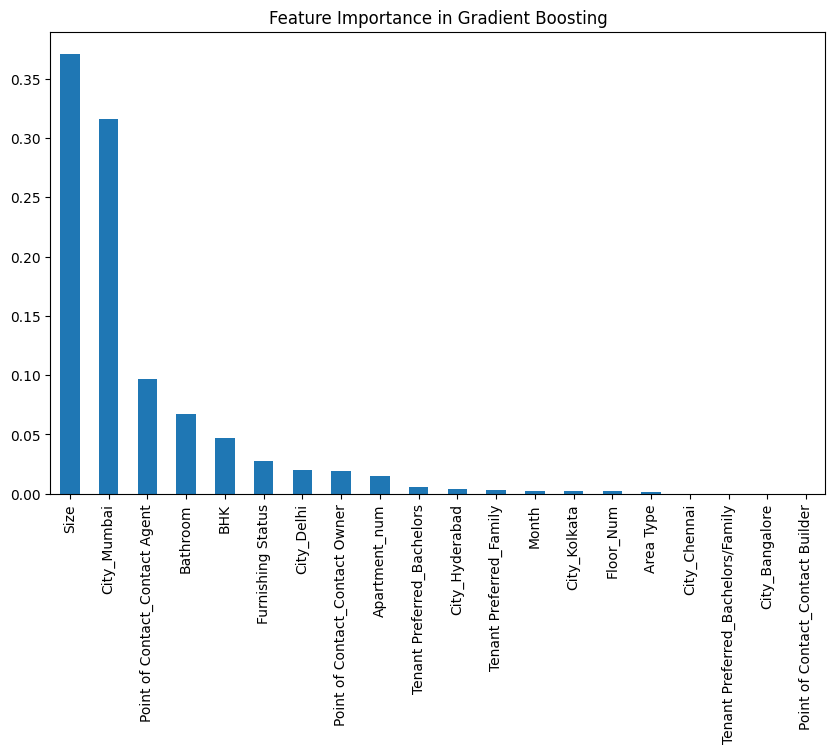

In [94]:
if hasattr(best_models[top_model]["model"], "feature_importances_"):
    feature_importance = pd.Series(
        best_models[top_model]["model"].feature_importances_, 
        index=X.columns
    ).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title(f'Feature Importance in {top_model}')
    plt.show()
else:
    print(f"The model {top_model} does not support feature_importances_.")


In [95]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(best_models[top_model]["model"], file)

with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)